## In this notebook we present a statistics analysis in different vizualization

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./acquired data/vulnerability_list_after_outliers.csv', index_col=0)

In [3]:
df.head(5)

,CVE_ID,Day,Month,Year,Language,Severity Score,Related Resources,Weakness Type,Attack Vector,Attack Complexity,Privilegs Required,User Interaction,Scope,Confidentiality,Integrity,Availability
0,CVE-2021-3348,31,1,2021,1,7.0,5,2,1,1,1,1,1,1,1,1
1,CVE-2021-23329,31,1,2021,2,7.5,3,1,2,2,2,1,1,2,2,1
2,WS-2021-0057,31,1,2021,3,6.2,2,1,1,2,2,1,1,2,2,1
3,WS-2021-0012,31,1,2021,2,8.3,2,1,2,1,2,2,2,1,1,1
4,WS-2021-0032,31,1,2021,3,4.0,2,1,1,2,2,1,1,2,2,2


# 1) One-Dimensional Visualization
Here we explore the behavior of each variable separately.

### Exploring Severity Score:

(array([  8.,  20.,  14.,  78.,  86., 288., 222., 249., 204., 105., 504.,
        102., 284.,  60., 299.]),
 array([ 2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,
         8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 15 artists>)

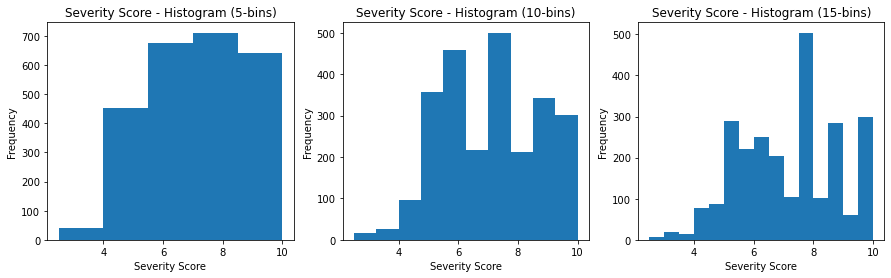

In [4]:
fig = plt.figure(figsize=(15,4))

fig1 = fig.add_subplot(1, 3, 1)
fig1.set_title('Severity Score - Histogram (5-bins)')
fig1.set_xlabel('Severity Score')
fig1.set_ylabel('Frequency')

fig2 = fig.add_subplot(1, 3, 2)
fig2.set_title('Severity Score - Histogram (10-bins)')
fig2.set_xlabel('Severity Score')
fig2.set_ylabel('Frequency')

fig3 = fig.add_subplot(1, 3, 3)
fig3.set_title('Severity Score - Histogram (15-bins)')
fig3.set_xlabel('Severity Score')
fig3.set_ylabel('Frequency')

fig1.hist(df['Severity Score'], bins=5)
fig2.hist(df['Severity Score'], bins=10)
fig3.hist(df['Severity Score'], bins=15)

What we see here?
1. According to graph 1, the values distributes in Bell shape, which tends to the right side (means values tends to be high).
2. In the next two graphes, we can see that the values flaquates, but the distribution looks similar.

### Exploring Exploit Language:

([<matplotlib.axis.XTick at 0x26742fad670>,
 [Text(0, 0, 'C'),
  Text(1, 0, 'JS'),
  Text(2, 0, 'RUST'),
  Text(3, 0, 'NIM'),
  Text(4, 0, 'Java'),
  Text(5, 0, 'Python'),
  Text(6, 0, 'PHP'),
  Text(7, 0, 'Go'),
  Text(8, 0, 'TYPE_SCRIPT'),
  Text(9, 0, 'Ruby'),
  Text(10, 0, 'SHELL'),
  Text(11, 0, 'SCALA'),
  Text(12, 0, 'Swift'),
  Text(13, 0, 'C#'),
  Text(14, 0, 'C++'),
  Text(15, 0, 'ERLANG'),
  Text(16, 0, 'KOTLIN'),
  Text(17, 0, 'Perl'),
  Text(18, 0, 'COFFEE_SCRIPT'),
  Text(19, 0, 'HASKELL'),
  Text(20, 0, 'SCHEME'),
  Text(21, 0, 'HTML'),
  Text(22, 0, 'GROOVY'),
  Text(23, 0, 'LUA'),
  Text(24, 0, 'VIM SCRIPT'),
  Text(25, 0, 'DEBIAN'),
  Text(26, 0, 'RPM')])

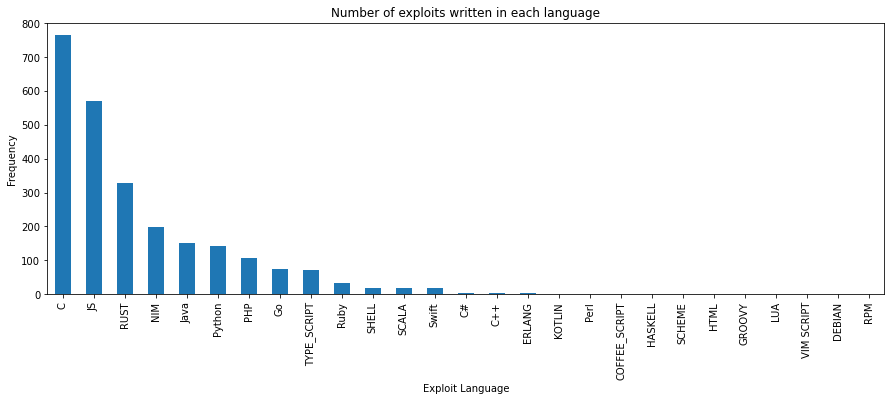

In [106]:
fig = plt.figure(figsize=(15,5))
col_names = ['C', 'JS', 'RUST', 'NIM', 'Java', 'Python', 'PHP', 'Go', 'TYPE_SCRIPT', 'Ruby', 'SHELL', 'SCALA', 'Swift', 'C#', 'C++', 'ERLANG', 'KOTLIN', 'Perl', 'COFFEE_SCRIPT', 'HASKELL', 'SCHEME', 'HTML', 'GROOVY', 'LUA', 'VIM SCRIPT', 'DEBIAN', 'RPM']

df["Language"].value_counts().plot(kind='bar')
plt.title('Number of exploits written in each language')
plt.ylabel('Frequency')
plt.xlabel('Exploit Language')
plt.xticks(range(0,27), col_names)

<u>Conclutions:</u>
1. Here we see that C is the most common language to write exploits.
2. As we know, the 'C' language allows direct access to memory, what gives the hackers more possibilities that aren't exists in other some other languages.

# Exploring other categorical properties (Using Bar & Pie charts 🍰)
Let's examine the behaviot of each categorical variable, that identify the severity of the attack exploit.

In [13]:
mycolors = ['#FA8072', '#7CFC00', '#00BFFF', '#EE82EE'] # fairly interesting colors :)

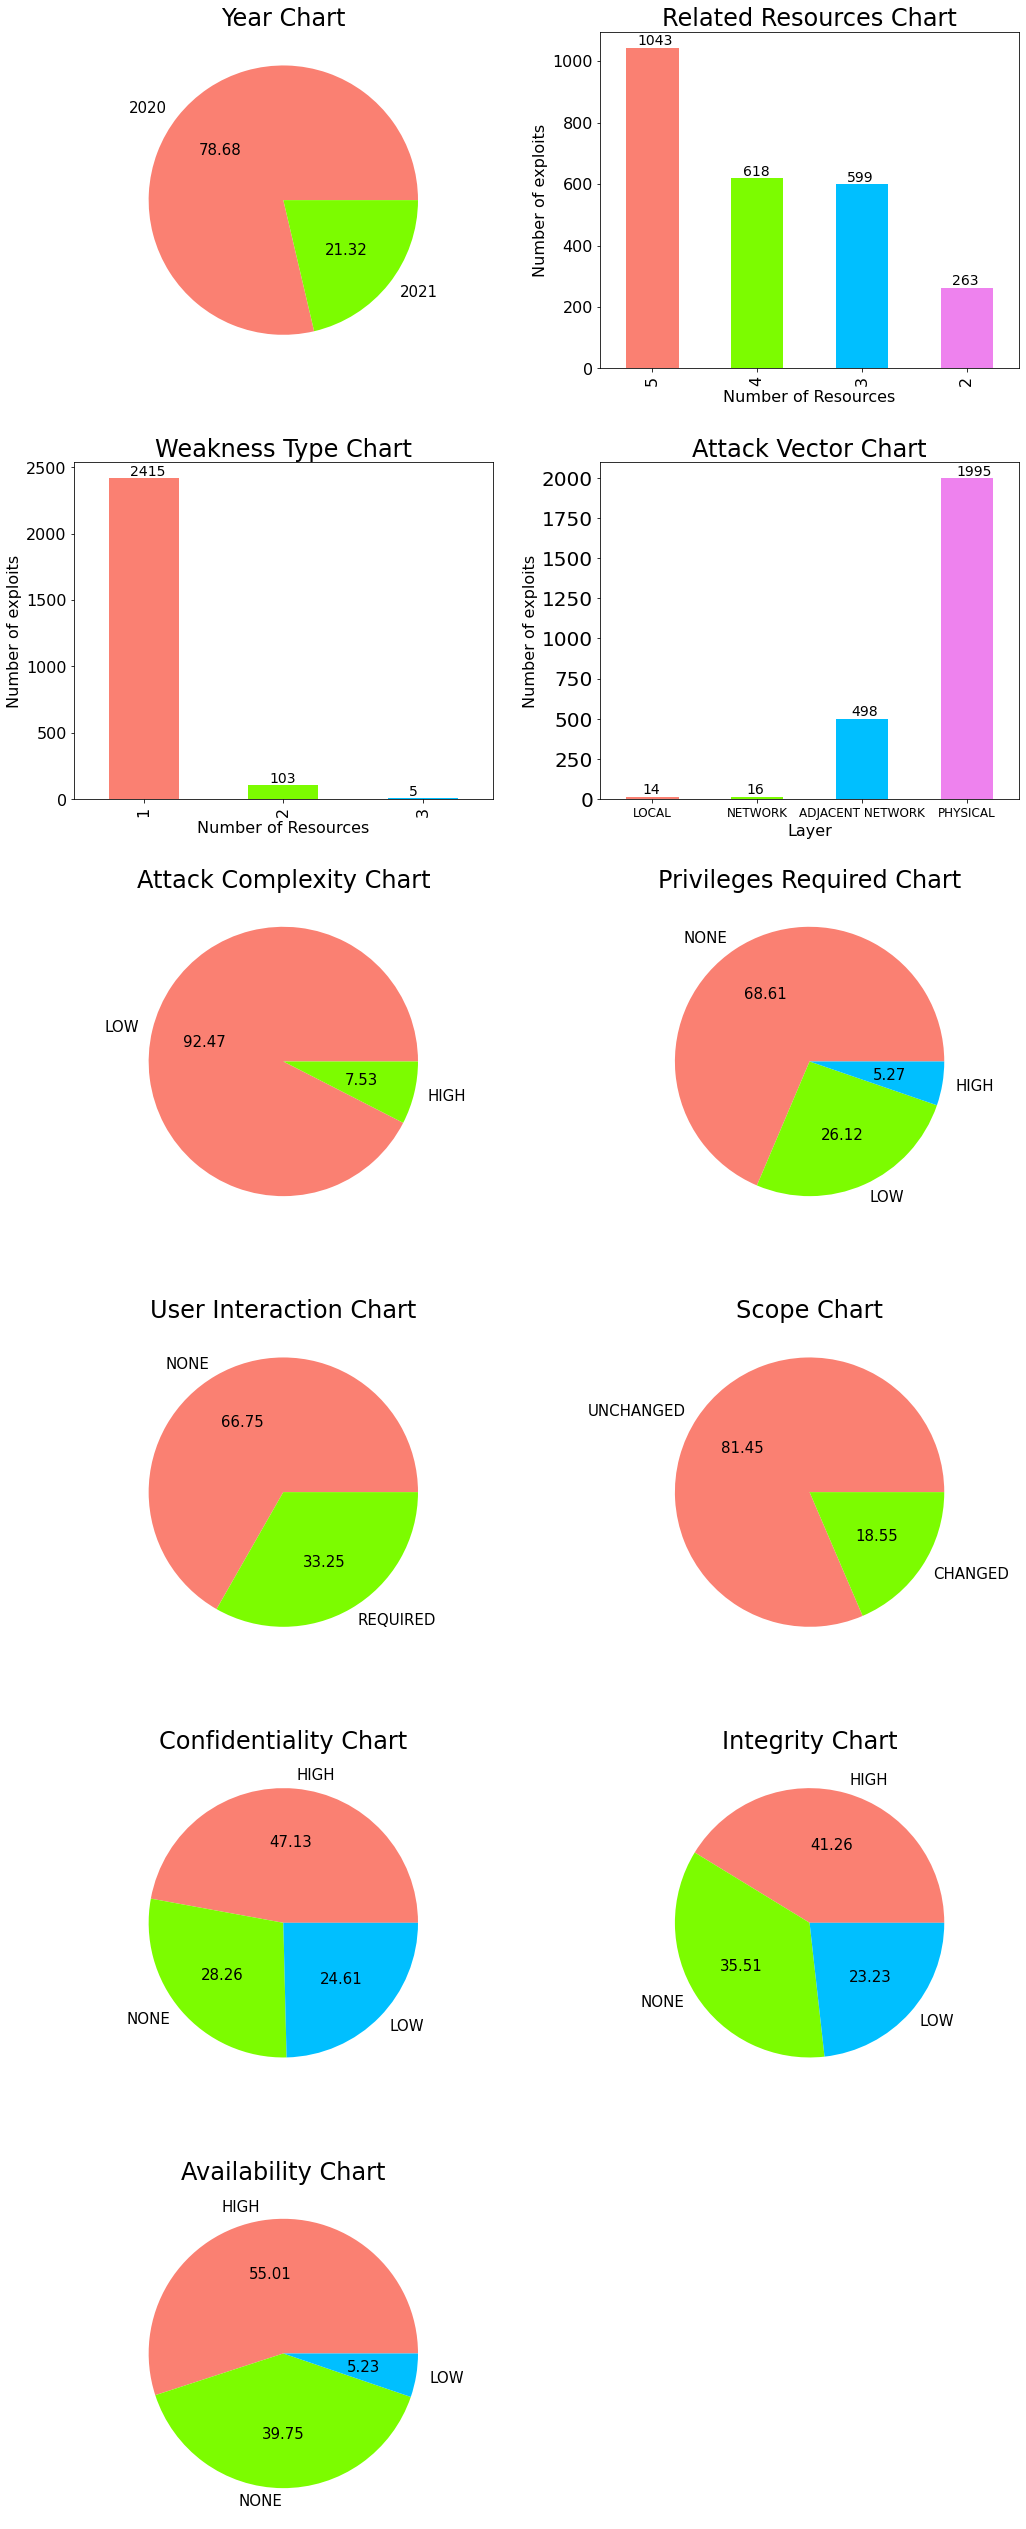

In [166]:
fig,ax=plt.subplots(6,2,figsize=(15,36))

df['Year'].value_counts().plot(ylabel='', title='Year Chart', kind='pie', labels=['2020', '2021'], autopct='%.2f', colors=mycolors, fontsize=15, ax=ax[0,0]).title.set_size(24)

### Related Resources
df['Related Resources'].value_counts().plot(kind='bar',ax=ax[0,1],color=mycolors, title='Related Resources Chart', fontsize=16).title.set_size(24)
ax[0,1].set_xlabel('Number of Resources', fontsize=16)
ax[0,1].set_ylabel('Number of exploits', fontsize=16)
for p in ax[0,1].patches:
    ax[0,1].annotate(str(p.get_height()), xy=(p.get_x() + p.get_width()/4.5, p.get_height()+10), size=14)

### Weakness Type
df['Weakness Type'].value_counts().plot(kind='bar',ax=ax[1,0],color=mycolors, title='Weakness Type Chart', fontsize=16).title.set_size(24)
ax[1,0].set_xlabel('Number of Resources', fontsize=16)
ax[1,0].set_ylabel('Number of exploits', fontsize=16)
for p in ax[1,0].patches:
    ax[1,0].annotate(str(p.get_height()), xy=(p.get_x() + p.get_width()/3.3, p.get_height()+20), size=14)


### Attack Vector
df['Attack Vector'].value_counts(ascending=True).plot(kind='bar',ax=ax[1,1],color=mycolors, title='Attack Vector Chart', fontsize=20).title.set_size(24)
col_names = ['LOCAL', 'NETWORK', 'ADJACENT NETWORK', 'PHYSICAL']
ax[1,1].set_xticklabels(col_names, fontsize=12, rotation=0)
ax[1,1].set_xlabel('Layer', fontsize=16)
ax[1,1].set_ylabel('Number of exploits', fontsize=16)
for p in ax[1,1].patches:
    ax[1,1].annotate(str(p.get_height()), xy=(p.get_x() + p.get_width()/3.3, p.get_height()+20), size=14)
    

### Attack Complexity
df['Attack Complexity'].value_counts().plot(ylabel='', title='Attack Complexity Chart', kind='pie', labels=['LOW', 'HIGH'], autopct='%.2f', colors=mycolors, fontsize=15, ax=ax[2,0]).title.set_size(24)


### Privileges Required
df['Privilegs Required'].value_counts().plot(ylabel='', title='Privileges Required Chart', kind='pie', labels=['NONE', 'LOW', 'HIGH'], autopct='%.2f', colors=mycolors, fontsize=15, ax=ax[2,1]).title.set_size(24)


### User Interaction
df['User Interaction'].value_counts().plot(ylabel='', title='User Interaction Chart', kind='pie', labels=['NONE', 'REQUIRED'], autopct='%.2f', colors=mycolors, fontsize=15, ax=ax[3,0]).title.set_size(24)


### Scope
df['Scope'].value_counts().plot(ylabel='', title='Scope Chart', kind='pie', labels=['UNCHANGED', 'CHANGED'], autopct='%.2f', colors=mycolors, fontsize=15, ax=ax[3,1]).title.set_size(24)


### Confidentiality
df['Confidentiality'].value_counts().plot(ylabel='', title='Confidentiality Chart', kind='pie', labels=['HIGH', 'NONE','LOW'], autopct='%.2f', colors=mycolors, fontsize=15, ax=ax[4,0]).title.set_size(24)


### Integrity
df['Integrity'].value_counts().plot(ylabel='', title='Integrity Chart', kind='pie', labels=['HIGH', 'NONE','LOW'], autopct='%.2f', colors=mycolors, fontsize=15, ax=ax[4,1]).title.set_size(24)


### Availability
df['Availability'].value_counts().plot(ylabel='', title='Availability Chart', kind='pie', labels=['HIGH', 'NONE','LOW'], autopct='%.2f', colors=mycolors, fontsize=15, ax=ax[5,0]).title.set_size(24)

plt.tight_layout(pad=3.0) # adjust the padding between each plot
fig.delaxes(ax[5][1])
plt.show()

# 2) Two-Dimensional Visualization

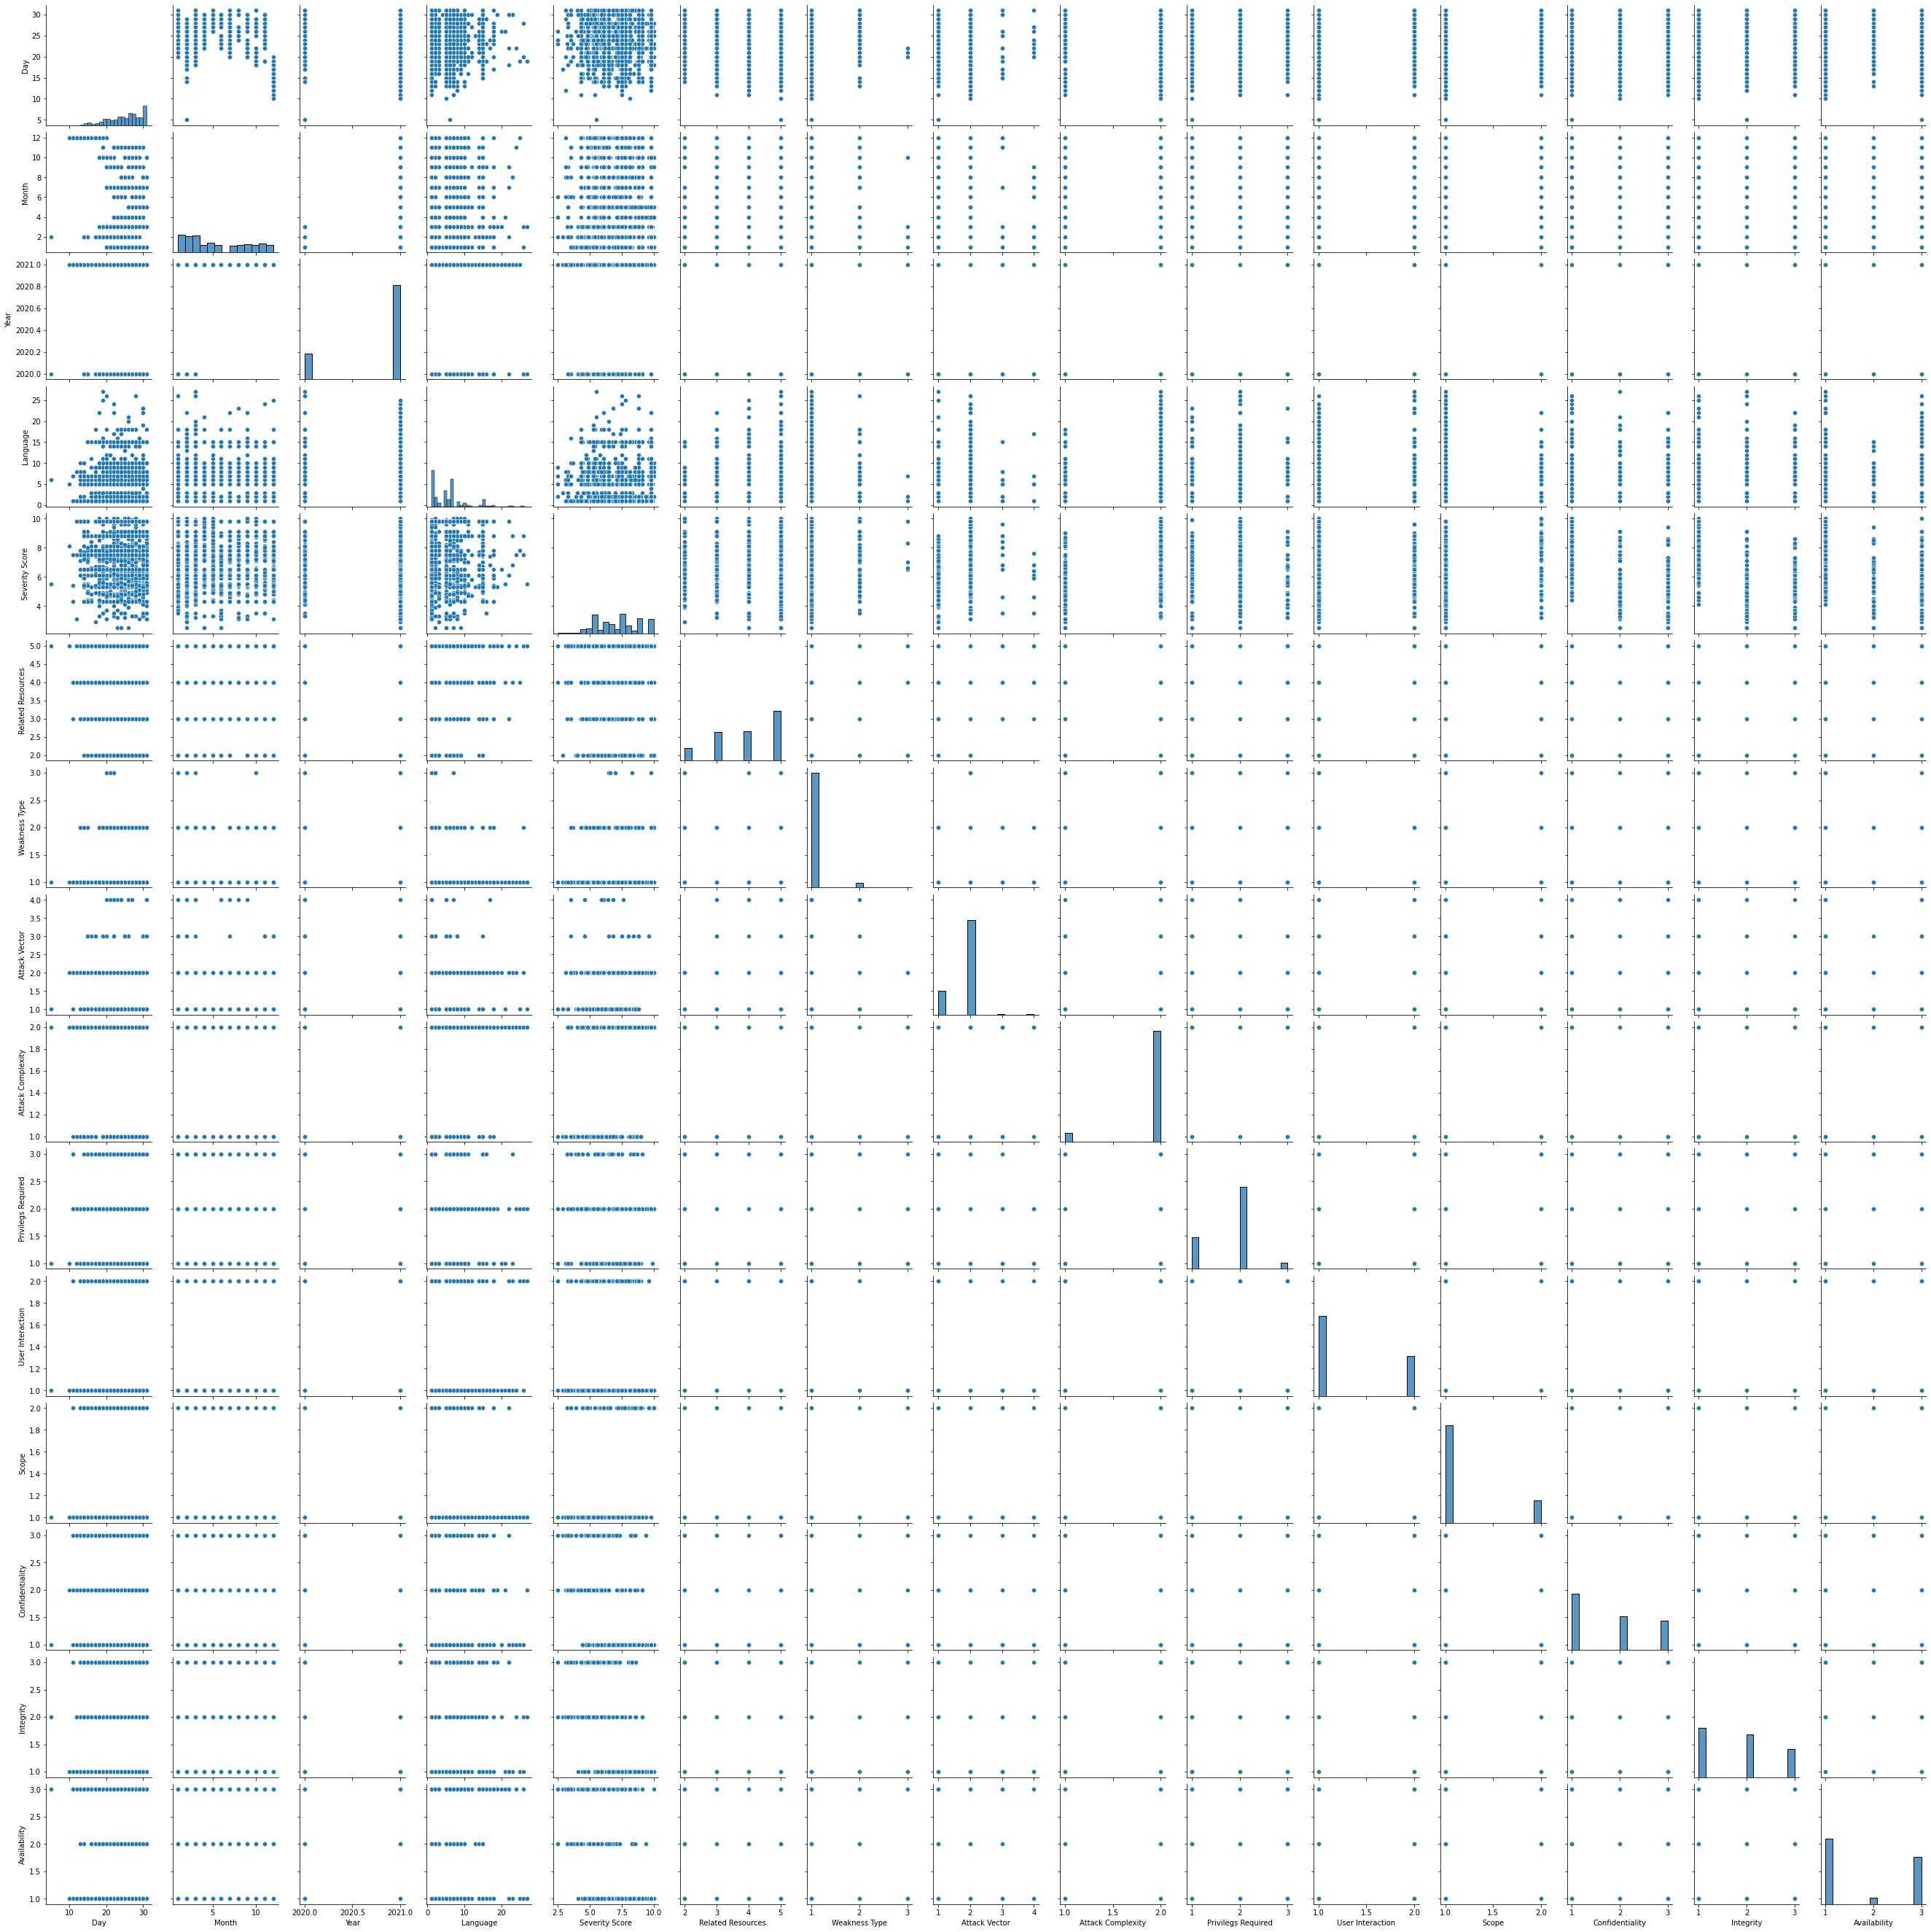

In [167]:
relevant_cols = df[df.columns[(df.columns != 'CVE_ID') & (df.columns != 'Day') & (df.columns != 'Month')& (df.columns != 'Year')]]
sns.pairplot(df)

# 3) Multi-Dimensional Visualization

## Correlations:
Let's check the pearson correlations between the variables.

<AxesSubplot:>

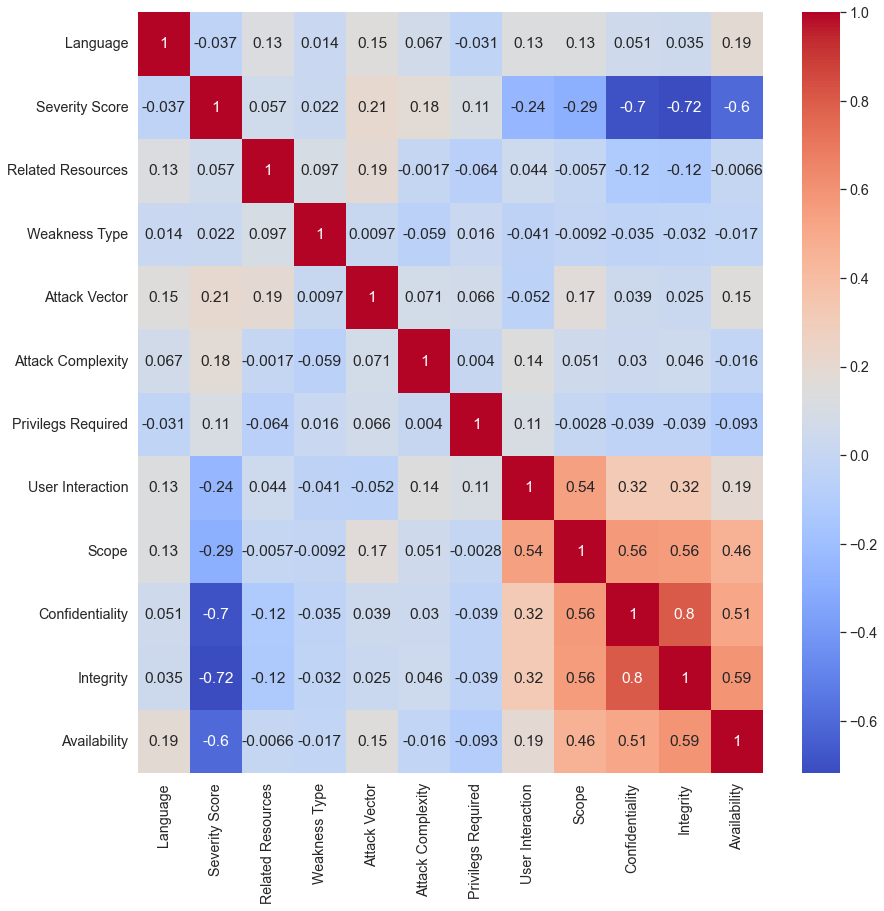

In [169]:
relevant_cols = df[df.columns[(df.columns != 'CVE_ID') & (df.columns != 'Day') & (df.columns != 'Month')& (df.columns != 'Year')]]

plt.figure(figsize = (14,14))
df2 = pd.DataFrame(df, columns = relevant_cols.columns)
sns.set(font_scale=1.3)
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')

In [ ]:
# for i in range(0, df.corr().unstack().sort_values().drop_duplicates().to_list().remove(1)):
    
#     corr_val = df.corr().unstack().sort_values().drop_duplicates()[i]
    
#     print(df.corr().unstack().sort_values().drop_duplicates().keys()[i])
    
#     print(corr_val)
# #     if (corr_val == )
#     df.corr().unstack().sort_values().drop_duplicates()[i]


#df.corr().unstack().sort_values().drop_duplicates()

In [ ]:
categorical_cols = df[df.columns[(df.columns != 'CVE_ID') & (df.columns !=  'Severity Score') & (df.columns !=  'Language')]]

# figs = plt.figure(figsize=(4,4))

# i = len(categorical_cols.columns) / 3
# j = len(categorical_cols.columns) / 5

#for i in range(1, 16):
#     fig = figs.add_subplot(i%3, i%5, i)
#     fig.pie(df['Related Resources'])
#     categorical_cols.value_counts().plot(kind='pie')


# figs = plt.figure(figsize=(15,15))

# fig1 = fig.add_subplot(2, 6, 1)
# fig1.set_title('Severity Score - Histogram (5-bins)')
# fig1.set_xlabel('Severity Score')
# fig1.set_ylabel('Frequency')

# for col in categorical_cols:
#     fig = figs.add_subplot(1, 3, 1)
#     df[col].value_counts().plot(kind='pie')

#plt.pie(df['Related Resources'])
# df['Related Resources'].value_counts().plot(kind='pie')
df.loc[[1,2][1,2]]